# Tik Tok Case Study
Author: Brent Artuch <br>
Date: 2023-06-17

## Introduction

This case study is one of the projects from the Google Advanced Data Analytics Certifications.

<b> Goal: </b>
The TikTok data team is developing a machine learning model for classifying claims made in videos submitted to the platform.

<b> Scenario: </b>
TikTok is the leading destination for short-form mobile video. The platform is built to help imaginations thrive. TikTok's
mission is to create a place for inclusive, joyful, and authentic content–where people can safely discover, create, and connect.

<b> Background on the TikTok Scenario: </b>
At TikTok, our mission is to inspire creativity and bring joy. Our employees lead with curiosity and move at the speed of culture.
Combined with our company's flat structure, you'll be given dynamic opportunities to make a real impact on a rapidly expanding
company and grow your career.

TikTok users have the ability to submit reports that identify videos and comments that contain user claims. These reports identify
content that needs to be reviewed by moderators. The process generates a large number of user reports that are challenging to
consider in a timely manner.

TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an
opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

<b> Note: </b> <i> The story, all names, characters, and incidents portrayed in this project are fictitious. No identification with
actual persons (living or deceased) is intended or should be inferred. And, the data shared in this project has been created for
pedagogical purposes. </i>

## Step 1: Imports
### Import libraries

In [45]:
# Packages for data manipulation
import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset.

In [46]:
data = pd.read_csv("dataset/tiktok_dataset.csv")

## Step 2: Inspect Data


In [47]:
data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [48]:
data.size

232584

In [49]:
data.shape

(19382, 12)

In [50]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [51]:
# Check for missing values
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [52]:
# Drop rows with missing values
data.dropna(axis = 0, inplace = True)
data.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [53]:
# Check for duplicates
data.duplicated().sum()

0

## Step 3: Exploratory Data Analysis

<Axes: xlabel='video_duration_sec'>

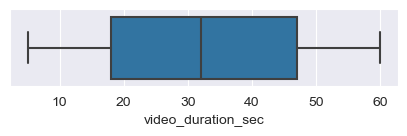

In [54]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_duration_sec'])

<Axes: xlabel='video_view_count'>

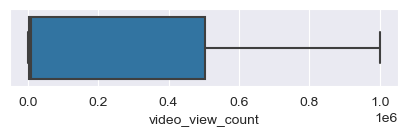

In [55]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_view_count'])

<Axes: xlabel='video_like_count'>

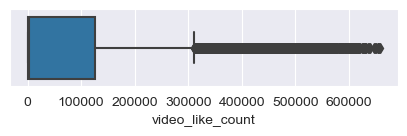

In [56]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_like_count'])

<Axes: xlabel='video_comment_count'>

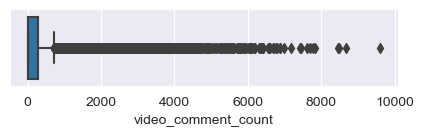

In [57]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(5,1))
sns.boxplot(x=data['video_comment_count'])

In [58]:
# handle outliers for video_like_count
q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.75)
iqr = q3 - q1
data = data[(data['video_like_count'] >= q1 - 1.5*iqr) & (data['video_like_count'] <= q3 + 1.5*iqr)]

In [59]:
# Check class balance for video_comment_count
data.groupby('verified_status')['video_comment_count'].mean()

verified_status
not verified    221.593951
verified         77.164940
Name: video_comment_count, dtype: float64

In [60]:
print(round((1158/16200)*100, 2), '% of the data is verified')

7.15 % of the data is verified


In [61]:
# Identify data points from majority and minority classes
majority = data[data['verified_status'] == 'not verified']
minority = data[data['verified_status'] == 'verified']

In [62]:
# Upsample the minority class (which is "verified")
from sklearn.utils import resample
minority_upsampled = resample(minority,
                              replace = True,
                              n_samples = len(majority),
                              random_state = 42)

In [63]:
# Combine majority and upsampled minority
data = pd.concat([majority, minority_upsampled])

In [64]:
# Display new class counts
data['verified_status'].value_counts()

not verified    16200
verified        16200
Name: verified_status, dtype: int64

In [65]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data.groupby('verified_status')['video_transcription_text'].apply(lambda x: np.mean(x.str.len()))

verified_status
not verified    88.846543
verified        83.756173
Name: video_transcription_text, dtype: float64

In [66]:
# Get the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].apply(lambda x: len(x))

In [67]:
# Display first few rows of dataframe after adding new column
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


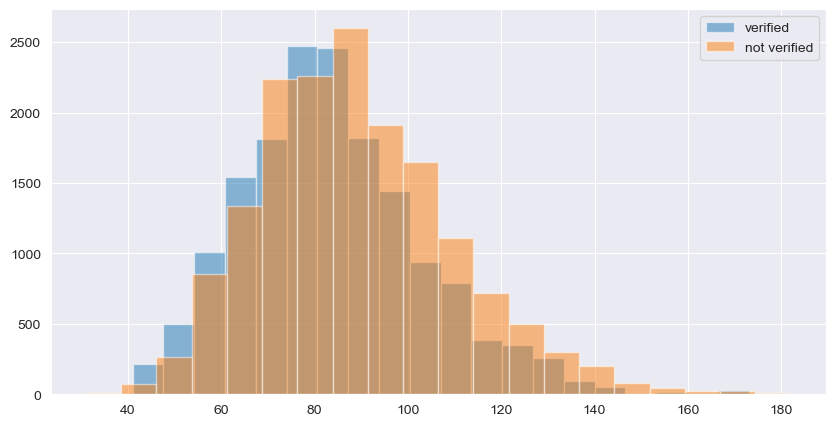

In [68]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in the same plot
plt.figure(figsize=(10,5))
plt.hist(data[data['verified_status'] == 'verified']['text_length'], bins = 20, alpha = 0.5, label = 'verified')
plt.hist(data[data['verified_status'] == 'not verified']['text_length'], bins = 20, alpha = 0.5, label = 'not verified')
plt.legend(loc = 'upper right')
plt.show()

## Step 4: Examine Correlations

In [69]:
# Code a correlation matrix to help determine most correlated variables
corr = data.corr(numeric_only=True)

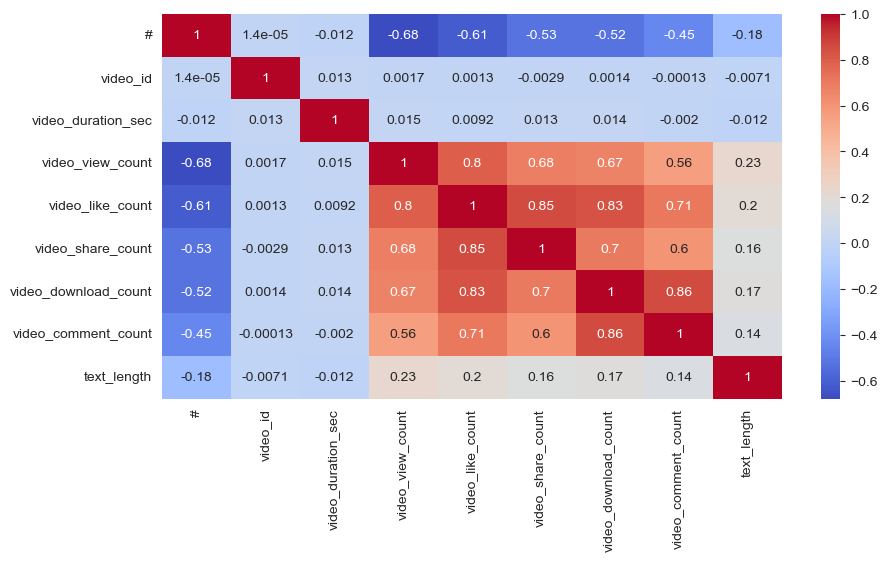

In [70]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm');

## Step 5: Prepare Data for Modeling

In [71]:
# Select outcome variable and features
y = data['verified_status']

X = data[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

In [72]:
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [73]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42,
                                                    test_size = 0.2)

In [74]:
# Get shape of each training and testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25920, 7)
(6480, 7)
(25920,)
(6480,)


In [75]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [76]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [77]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [78]:
# Select the training features that needs to be encoded
X_train_categorical = X_train[["claim_status", "author_ban_status"]]
X_train_categorical.head()

,claim_status,author_ban_status
12320,opinion,active
5582,claim,active
16903,opinion,active
13745,opinion,active
12971,opinion,active


In [79]:
# Set up an encoder for one-hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse = False)

In [80]:
# Fit and transform the training features using the encoder
X_train_encoded = enc.fit_transform(X_train_categorical)

/Users/tukles/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
# Get feature names from encoder
enc.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [82]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [83]:
# Convert encoded training features into a dataframe
X_train_encoded_df = pd.DataFrame(X_train_encoded,
                                  columns = enc.get_feature_names_out())

In [84]:
# Display first few rows of encoded training features dataframe
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [85]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped
X_train.drop(["claim_status", "author_ban_status"], axis = 1).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
12320,10,5346.0,382.0,2.0,0.0
5582,22,14801.0,44.0,78.0,7.0
16903,22,2721.0,98.0,23.0,3.0
13745,46,1482.0,149.0,9.0,0.0
12971,41,9418.0,206.0,3.0,0.0


In [86]:
# Concatenate the two dataframes
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,10,5346.0,382.0,2.0,0.0,1.0,0.0,0.0
1,22,14801.0,44.0,78.0,7.0,0.0,0.0,0.0
2,22,2721.0,98.0,23.0,3.0,1.0,0.0,0.0
3,46,1482.0,149.0,9.0,0.0,1.0,0.0,0.0
4,41,9418.0,206.0,3.0,0.0,1.0,0.0,0.0


In [87]:
y_train.dtypes

dtype('O')

In [88]:
y_train.unique()

array(['not verified', 'verified'], dtype=object)

In [89]:
# Set up an encoder for one-hot encoding the categorical outcome variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
# Fit and transform the outcome variable using the encoder
y_train_encoded = le.fit_transform(y_train)

In [93]:
# Display first few rows of encoded outcome variable
y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

## Step 6: Build and Evaluate Model

In [95]:
# Construct a logistic regression model and fit it to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_final, y_train_encoded);

In [96]:
# Select the testing features that needs to be encoded
X_test_categorical = X_test[["claim_status", "author_ban_status"]]
X_test_categorical.head()

,claim_status,author_ban_status
15905,opinion,banned
7667,claim,active
18378,opinion,active
9550,claim,active
17171,opinion,active


In [99]:
# Transform the testing features using the encoder
X_test_encoded = enc.transform(X_test_categorical)
X_test_encoded

array([[1., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 1.]])

In [100]:
# Convert encoded testing features into a dataframe
X_test_encoded_df = pd.DataFrame(X_test_encoded,
                                  columns = enc.get_feature_names_out())
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [101]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped
X_test.drop(["claim_status", "author_ban_status"], axis = 1).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
15905,38,4096.0,238.0,18.0,4.0
7667,14,112926.0,5513.0,336.0,123.0
18378,17,8925.0,271.0,18.0,7.0
9550,31,632367.0,5454.0,1530.0,44.0
17171,57,5232.0,716.0,51.0,12.0


In [102]:
# Concatenate the two dataframes
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,38,4096.0,238.0,18.0,4.0,1.0,1.0,0.0
1,14,112926.0,5513.0,336.0,123.0,0.0,0.0,0.0
2,17,8925.0,271.0,18.0,7.0,1.0,0.0,0.0
3,31,632367.0,5454.0,1530.0,44.0,0.0,0.0,0.0
4,57,5232.0,716.0,51.0,12.0,1.0,0.0,0.0


In [103]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = classifier.predict(X_test_final)

In [104]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [105]:
y_test

15905        verified
7667     not verified
18378        verified
9550     not verified
17171    not verified
             ...     
12717        verified
14948        verified
3392     not verified
15284        verified
17968        verified
Name: verified_status, Length: 6480, dtype: object

In [106]:
# Encode the testing outcome variable
y_test_encoded = le.transform(y_test)

## Step 7: Evaluate Model Performance

In [107]:
# Get shape of each training and testing set
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(25920, 8)
(6480, 8)
(25920,)
(6480,)


In [112]:
# Construct a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_encoded, y_pred, labels=classifier.classes_)

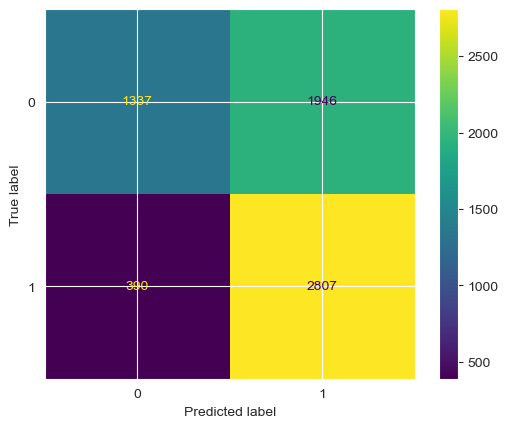

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
log_disp.plot()
plt.show()

In [116]:
# Construct a classification report
from sklearn.metrics import classification_report
target_labels = ['not verified', 'verified']
print(classification_report(y_test_encoded, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

not verified       0.77      0.41      0.53      3283
    verified       0.59      0.88      0.71      3197

    accuracy                           0.64      6480
   macro avg       0.68      0.64      0.62      6480
weighted avg       0.68      0.64      0.62      6480



In [118]:
# Get the feature names from the model and the model coefficients
pd.DataFrame(data={"Feature Name":classifier.feature_names_in_, "Model Coefficient":classifier.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.007910
1,video_view_count,-0.000002
2,video_share_count,0.000003
3,video_download_count,-0.000236
4,video_comment_count,0.000193
5,claim_status_opinion,0.000359
6,author_ban_status_banned,-0.000017
7,author_ban_status_under review,-0.000012
